In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [78]:
data = pd.read_csv('cleanData.csv')
features = data.drop(['Win_Loss'], axis=1) 
features.head()

,Home,Away,Neutral,ACC,BIG10,BIG12,SEC,NONP4,Off_Passing_Cmp,Off_Passing_Att,Off_Passing_Yds,Off_Rushing_Att,Off_Rushing_Yds,Off_First_Downs_Tot,Off_Penalties_No.,Off_Penalties_Yds,Off_Turnovers_Tot,Def_Passing_Cmp,Def_Passing_Att,Def_Passing_Yds,Def_Rushing_Att,Def_Rushing_Yds,Def_First_Downs_Tot,Def_Penalties_No.,Def_Penalties_Yds,Def_TO
0,0.967418,-0.834643,-0.280306,-1.293277,-0.203419,4.714952,-0.379393,-0.445435,1.659904,1.715239,0.799832,-0.203327,-1.068332,1.138224,1.234548,1.743615,0.268589,-0.364458,-0.021985,0.314654,-1.088805,-1.798565,-1.491244,1.147986,0.413675,0.185993
1,0.967418,-0.834643,-0.280306,0.773229,-0.203419,-0.212091,-0.379393,-0.445435,1.516759,1.356015,0.714972,-1.065754,-1.344432,-0.358754,4.929625,3.817059,-1.321877,1.181419,0.941829,2.866308,-0.207843,-0.961795,1.229390,3.363269,2.547874,0.185993
2,0.967418,-0.834643,-0.280306,-1.293277,-0.203419,-0.212091,-0.379393,2.244994,-0.200971,-0.260498,0.072457,-0.548298,-0.810045,-0.358754,-0.243484,-0.122484,-0.526644,0.872243,0.941829,-0.252380,1.774323,0.222556,1.048015,-0.328869,-0.416292,1.664149
3,-1.033679,1.198117,-0.280306,0.773229,-0.203419,-0.212091,-0.379393,-0.445435,1.803048,1.894852,0.799832,-0.375813,-0.792232,0.576857,-0.243484,-0.910393,1.063821,0.408480,0.513467,0.491852,-0.538204,-1.051909,-0.040239,0.409558,0.453197,0.185993
4,-1.033679,1.198117,-0.280306,0.773229,-0.203419,-0.212091,-0.379393,-0.445435,1.373615,0.727371,0.945308,-0.548298,-0.854577,-0.358754,0.495532,0.665424,0.268589,-0.209871,-0.021985,1.980317,0.122518,-0.755821,0.322512,0.040345,0.650808,0.185993


Elbow Plot for k between 7 and 13

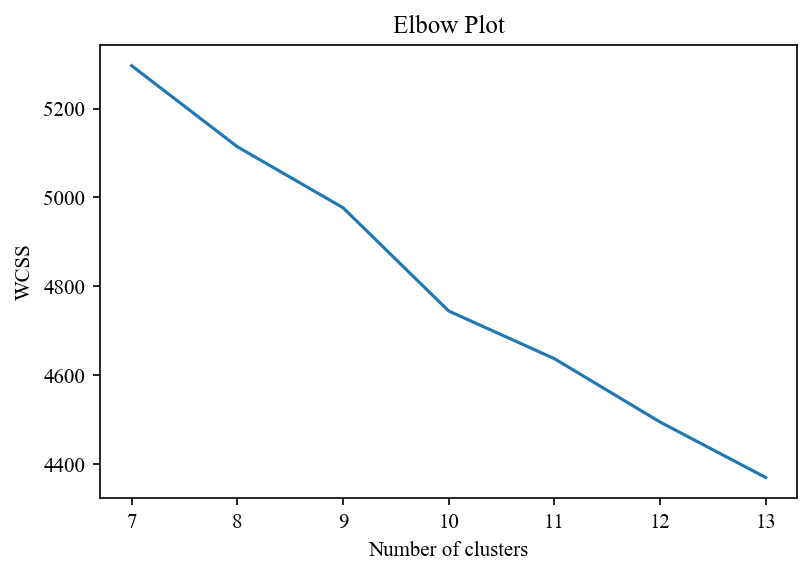

In [79]:

WCSS_list = []
for i in range(7, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    WCSS_list.append(kmeans.inertia_)

plt.figure(dpi=150)
plt.plot(range(7, 14), WCSS_list)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Choose 10 Clusters

Visualize the clustering results in a two-dimensional space (PCA)

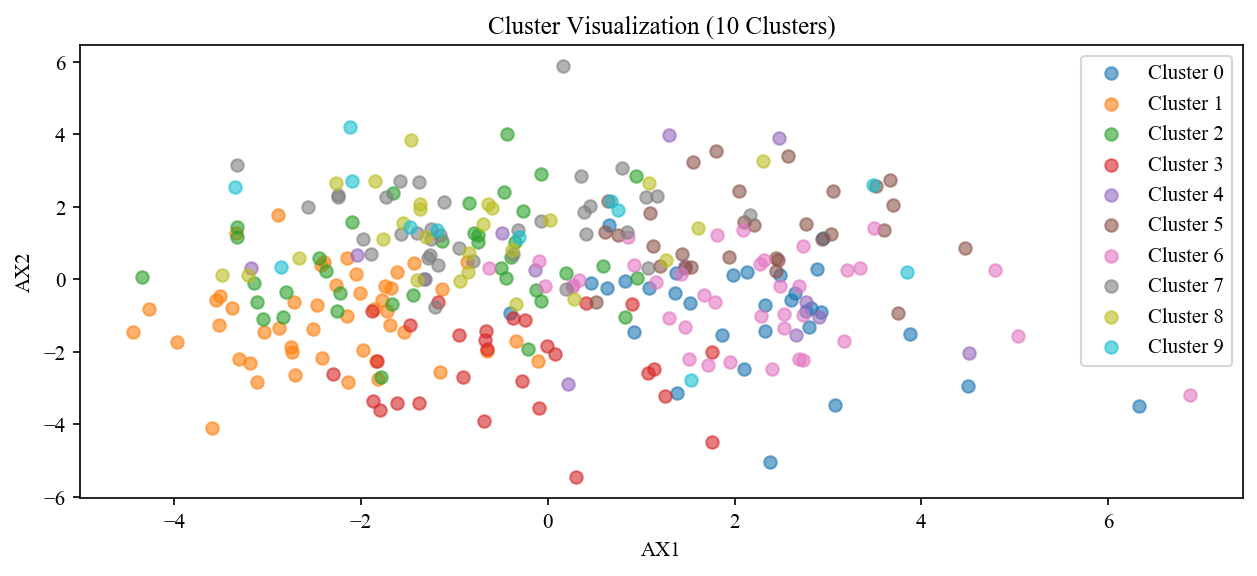

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features)
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=k)
clusters = kmeans.fit_predict(data)

features['Cluster'] = clusters
data['Cluster'] = clusters
pca_df['Cluster'] = clusters
plt.figure(dpi=150).set_figwidth(10)
for cluster in range(k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('AX1')
plt.ylabel('AX2')
plt.legend()
plt.title('Cluster Visualization (10 Clusters)')
plt.show()

<Figure size 432x288 with 0 Axes>

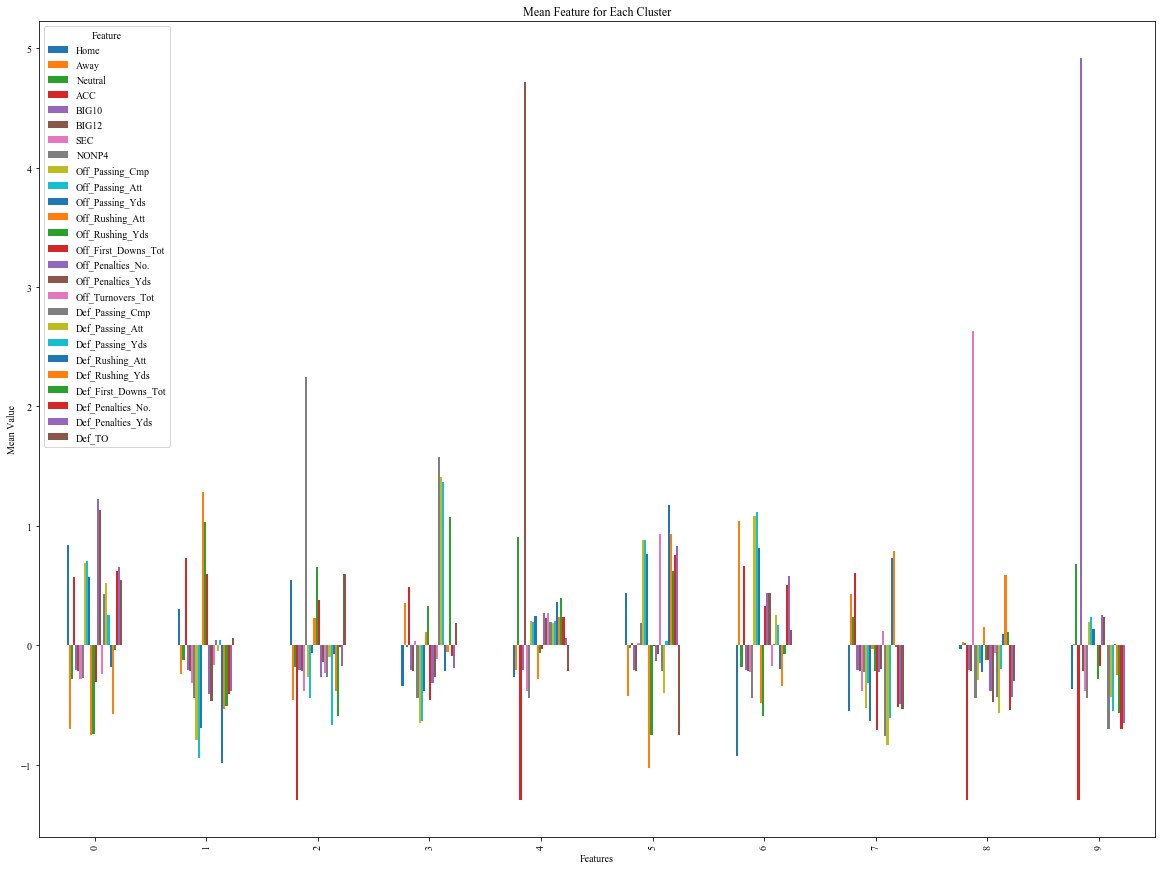

In [81]:
cluster_means=features.groupby('Cluster').mean()
plt.figure()
cluster_means.plot(kind='bar',figsize=(20,15))
plt.title('Mean Feature for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.show()


<Figure size 432x288 with 0 Axes>

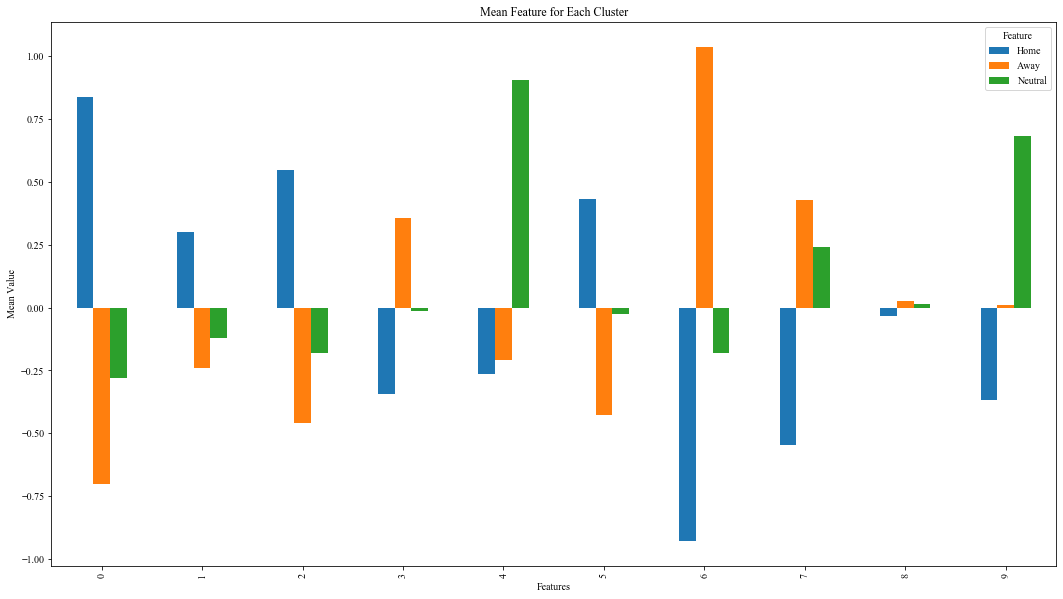

In [82]:
plt.figure()
cluster_means.iloc[:,:3].plot(kind='bar',figsize=(18,10))
plt.title('Mean Feature for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.show()


<Figure size 432x288 with 0 Axes>

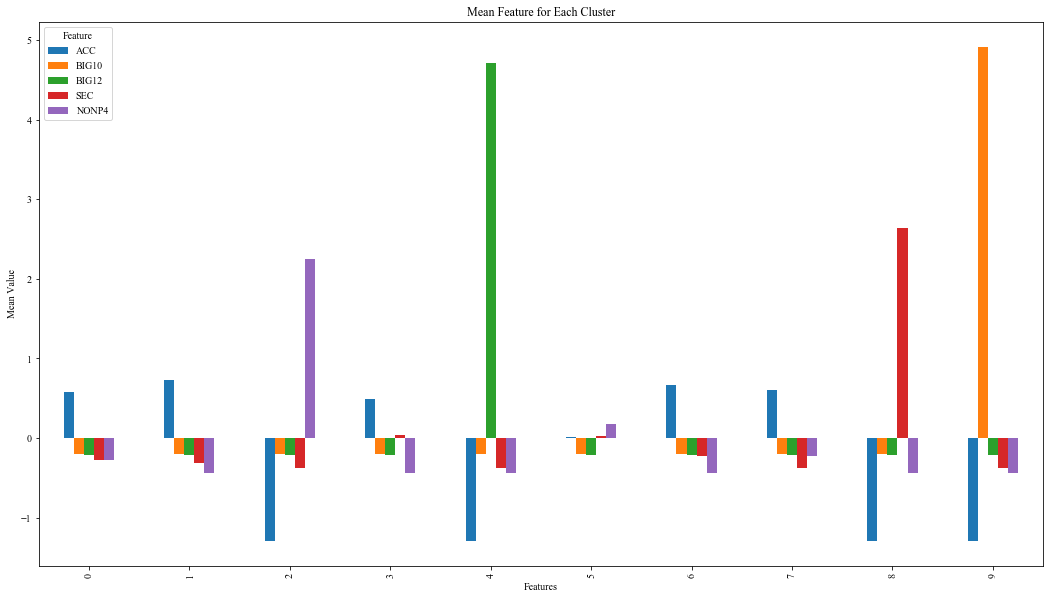

In [83]:
plt.figure()
cluster_means.iloc[:,3:8].plot(kind='bar',figsize=(18,10))
plt.title('Mean Feature for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.show()

<Figure size 432x288 with 0 Axes>

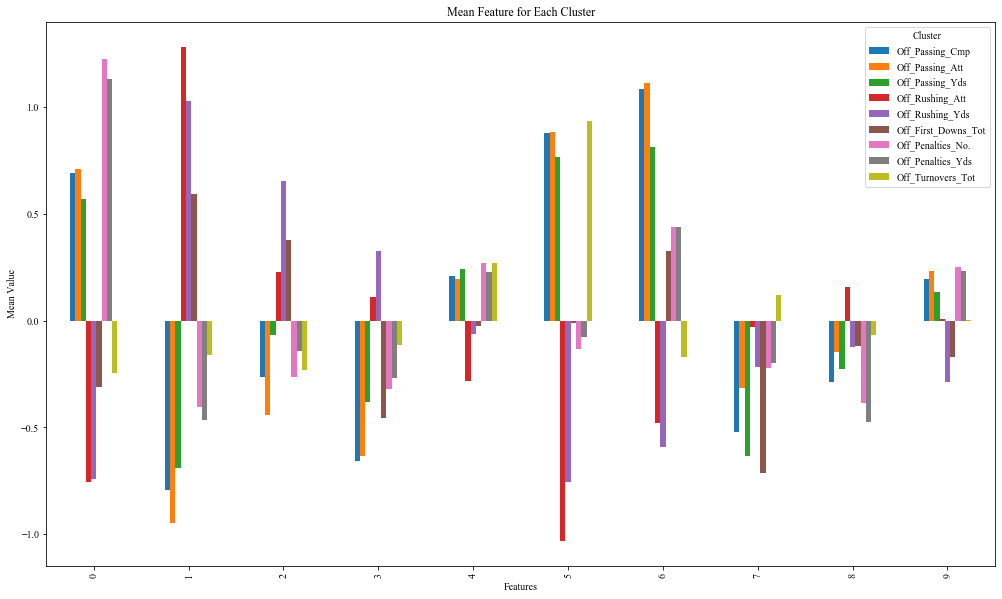

In [84]:
plt.figure()
cluster_means.iloc[:,8:17].plot(kind='bar',figsize=(17,10))
plt.title('Mean Feature for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.show()

<Figure size 432x288 with 0 Axes>

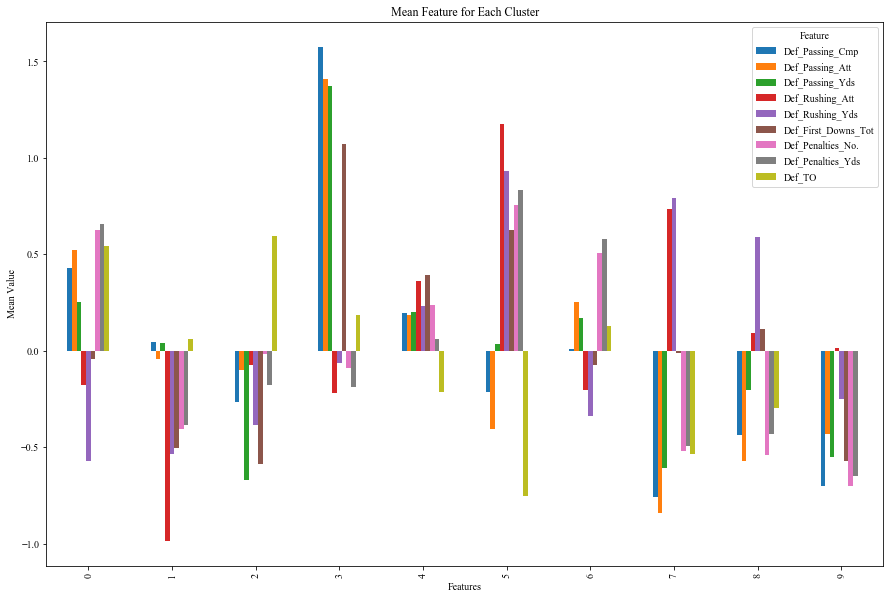

In [85]:
plt.figure()
cluster_means.iloc[:,17:].plot(kind='bar',figsize=(15,10))
plt.title('Mean Feature for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.show()

In [86]:
cluster_means
cluster_means.to_csv('cluster_means.csv',index=False)

In [87]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

data2 = pd.read_csv('cleanData_with_opponents.csv')
features["Opponent"]=data2["Opponent"]
cluster_counts=features.groupby('Opponent')["Cluster"].value_counts()
cluster_counts.to_csv('counts_result.csv')

In [88]:
most_frequent_clusters = cluster_counts.groupby(level=0).head(1)

result = most_frequent_clusters.reset_index(name='Count')
result.to_csv('most_frequent_result.csv',index=False)